# Imports

In [1]:
import keras
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scripts.ksplot import make_ks_plot

# Latex settings block

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.numpoints": 1,
    "axes.linewidth": 2,
    "legend.title_fontsize": 18,
    "axes.labelsize": 18,
    "legend.fontsize": 16
})

# Load training and testing arrays along with their labels and variable and label names
# Such files is created by the make_npz_tracks.py script

In [3]:
with np.load("root_files/combined_tracks_train.npz") as f:
    X_train = f['features']
    y_train = f['labels']
    features = list(f['names'])
    
with np.load("root_files/combined_tracks_test.npz") as f:
    X_test = f['features']
    y_test = f['labels']

# Load the best weights of the keras model

In [4]:
model = keras.models.load_model(f"model_checkpoints/MLP_tracks.h5")

# Print the loss and accuracy of the model on the train and test data sets
# Run model inference on train and test data sets
# Create ROC curve

In [5]:
evaluation_train = model.evaluate(X_train, y_train, batch_size=2**16)
evaluation_test = model.evaluate(X_test, y_test, batch_size=2**16)
predict_array_train = model.predict(X_train, batch_size=2**16)
predict_array_test = model.predict(X_test, batch_size=2**16)
accuracy = evaluation_test[1]
fpr, tpr, threshold = roc_curve(y_test[:,0], predict_array_test[:,0])
print(evaluation_train)
print(evaluation_test)
print(accuracy)

2022-12-06 02:22:35.185942: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 1s 69ms/step
[0.2370891273021698, 0.8998690843582153]
[0.2407652884721756, 0.897926926612854]
0.897926926612854


# Plot ROC curve

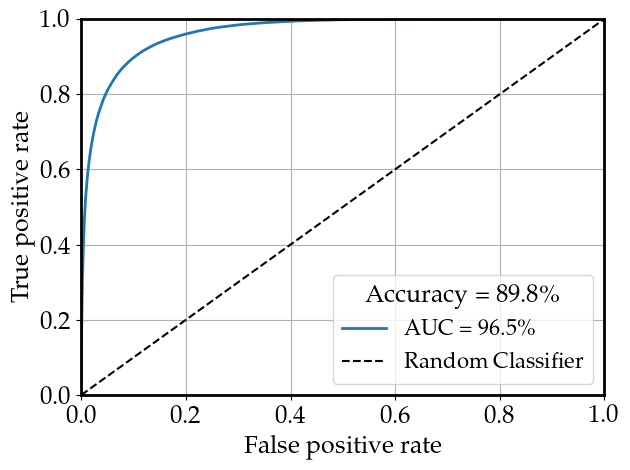

In [6]:
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr,tpr)*100:.1f}\%")
plt.plot(np.linspace(0,1),np.linspace(0,1),color='k',ls='--',label = 'Random Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.legend(loc='lower right', title=f'Accuracy = {accuracy*100:.1f}\%')
plt.tight_layout()
plt.savefig("plots/ROC_MLP_tracks_test.pdf")
plt.show()

# Create KS histogram of classifier output to check for overtraining

In [7]:
fig = make_ks_plot(y_train[:,0], predict_array_train[:,0],
                   y_test[:,0], predict_array_test[:,0])
fig.savefig("plots/KS_MLP_tracks_test.pdf")

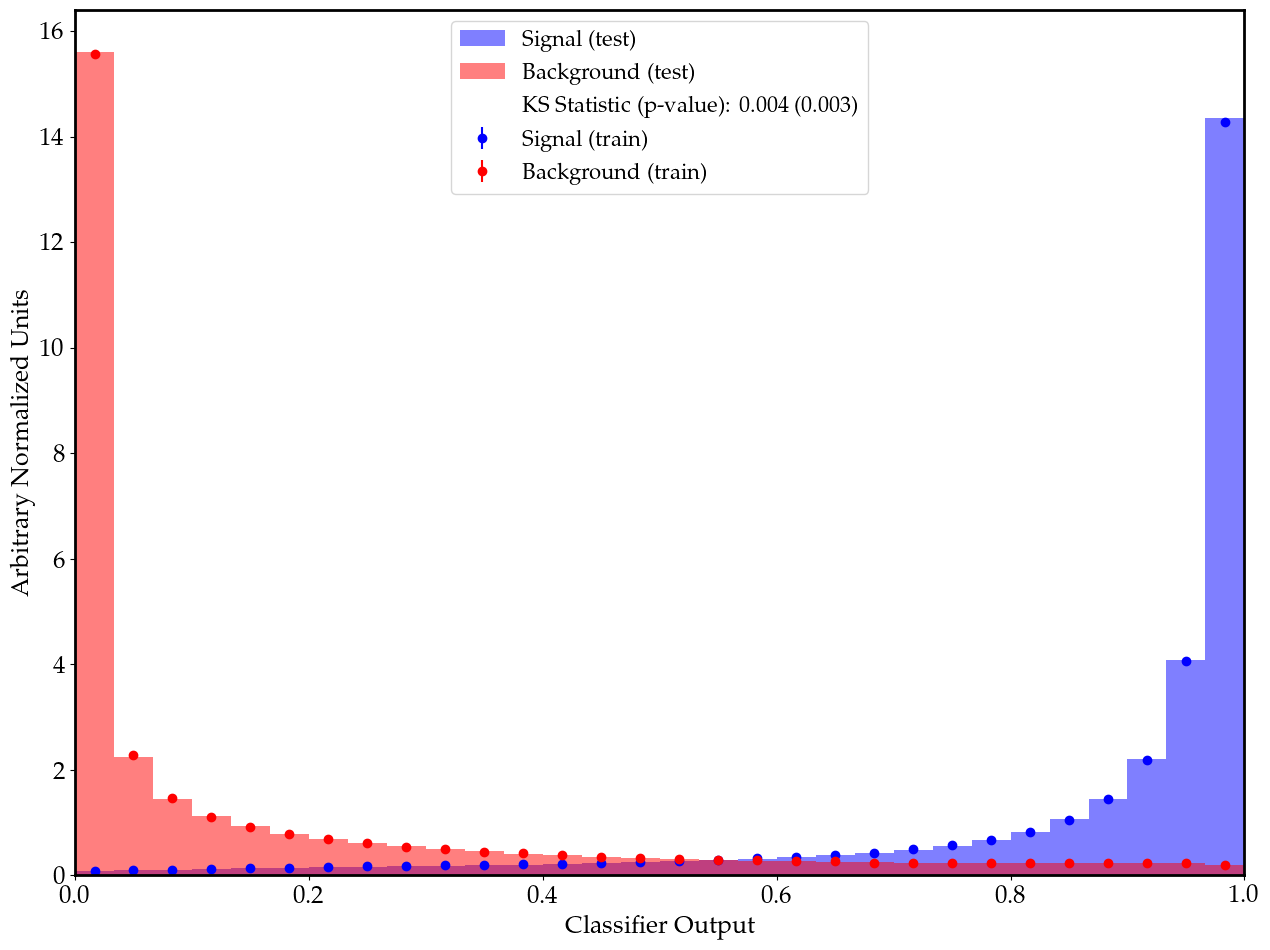

In [8]:
fig